In [1]:
import spacy

# spacy architecture

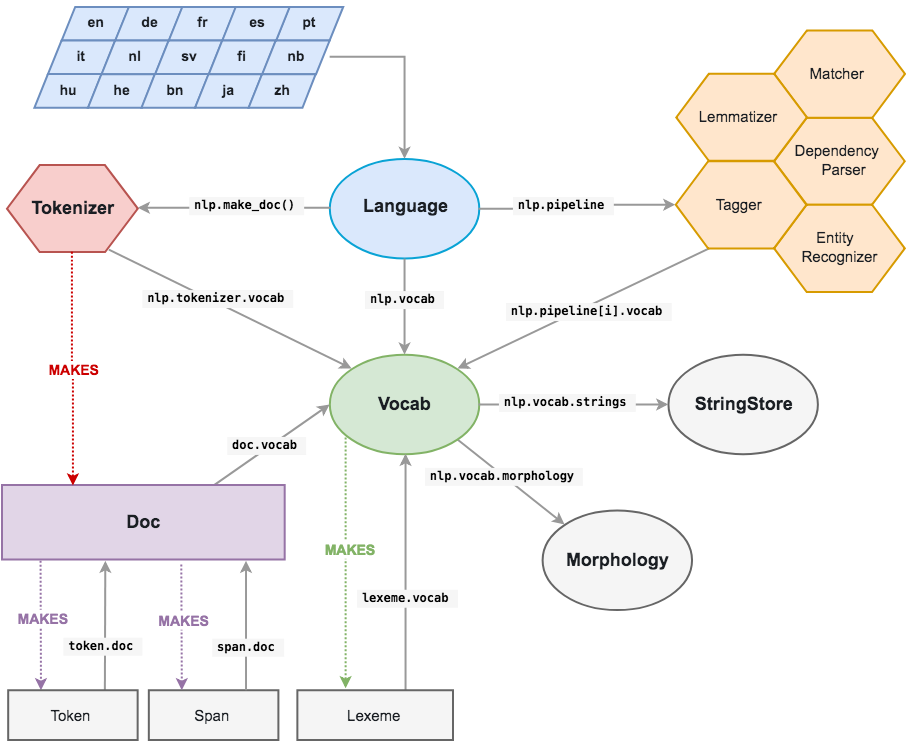

# TOKENIZATION

In [2]:
text = "This is a sentence. And this is another sentence." 
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for token in doc:
    print(token, token.pos_)

This DET
is VERB
a DET
sentence NOUN
. PUNCT
And CCONJ
this DET
is VERB
another DET
sentence NOUN
. PUNCT


# SENTENCE SEGMENTATION

In [3]:
text = "This is a sentence. And this is another sentence."
doc = nlp(text)
for sent in doc.sents:
    print([(token, token.pos_) for token in sent])

[(This, 'DET'), (is, 'VERB'), (a, 'DET'), (sentence, 'NOUN'), (., 'PUNCT')]
[(And, 'CCONJ'), (this, 'DET'), (is, 'VERB'), (another, 'DET'), (sentence, 'NOUN'), (., 'PUNCT')]


## Each sentence is represented as SPANS.

In [9]:
type(doc.sents.__next__())

spacy.tokens.span.Span

# POS and Dependency Parsing

In [10]:
text = "This is a sentence. And this is another sentence." 
doc = nlp(text)
for token in doc:
    print(token, token.pos_, token.dep_, token.head)

This DET nsubj is
is VERB ROOT is
a DET det sentence
sentence NOUN attr is
. PUNCT punct is
And CCONJ cc is
this DET nsubj is
is VERB ROOT is
another DET det sentence
sentence NOUN attr is
. PUNCT punct is


In [11]:
from spacy import displacy
from IPython.core.display import display, HTML
html = displacy.render(doc, style='dep')
display(HTML(html))

In [12]:
text = "I live in Seattle and love to go hiking at Margaret's way."
doc = nlp(text)
for ent in doc.ents:
    print(ent, ent.label_, [token.dep_ for token in ent])

Seattle GPE ['pobj']
Margaret PERSON ['poss']


In [13]:
displacy.render(doc, style='ent', jupyter=True)

# Custom NER models is Spacy

PIPELINES of Spacy

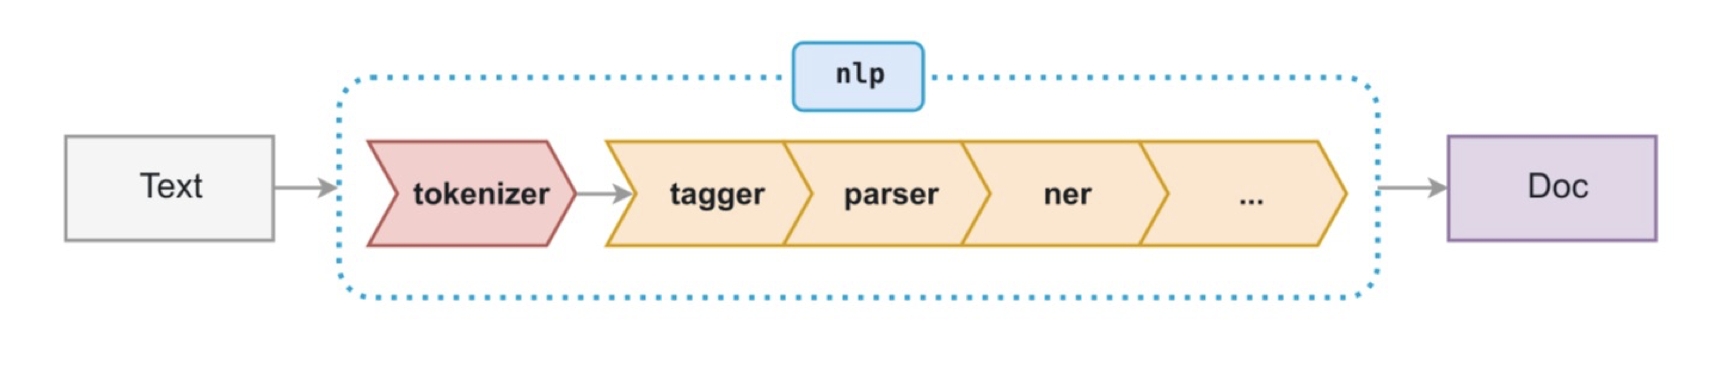

In [15]:
import spacy
import random

nlp = spacy.load('en')
train_data = [("Uber blew through $1 million", {'entities': [(0, 4, 'ORG')]})]

with nlp.disable_pipes(*[pipe for pipe in nlp.pipe_names if pipe != 'ner']):
    optimizer = nlp.begin_training()
    for i in range(10):
        random.shuffle(train_data)
        for text, annotations in train_data:
            nlp.update([text], [annotations], sgd=optimizer)
nlp.to_disk('./model')

In [17]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [19]:
def custom_processor(doc):
    # Do something with doc here: add annotations, merge spans, ...
    print('length of tokens', len(doc.sents))
    return doc 
nlp.add_pipe(custom_processor, name='length_tokens', first=True)

print(nlp.pipe_names)

['length_tokens', 'silly_processor', 'tagger', 'parser', 'ner']
